# 第６回 解答例
1. 6-7を改良し，サイコロの目の総和が100を超えるまでの平均待ち時間を 試行数10回，100回，1000回，10000回についてそれぞれ計算せよ．
1. ランダムウォークの結果を5つ重ねてプロットせよ
1. ライト-フィッシャーモデルを仮定し世代交代を繰り返し，集団に突然変異が固定する場合について，その100回分の平均待ち時間Tを求めよ
1. N個体の集団内に占める突然変異対立遺伝子を持つ個体の数をk，その頻度をp（=k/N）とする．N=100，N=200の場合について，それぞれkを1〜NまでN/10刻みで変化させ，突然変異の初期頻度pに対する平均待ち時間Tを10個ずつプロットせよ．
1. 半数体生物に対して突然変異固定までの平均待ち時間Tの解析解が$T(p)=-\frac{1}{p}(2N(1-p)\log(1-p))$で与えられるとき，このグラフを$N=100$，$N=200$について描き，同じグラフ上で上記のプロットと比較し，考察せよ．

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import random, copy

# 1

In [2]:
def dice6(trial_num):
    """サイコロを`trial_num`回振る
    
    Args:
        trial_num: 試行回数
        
    Returns:
        iList: 出た目を記録したリスト
    
    """
    iList = []
    for num in range(trial_num):
        x = 0
        for i in range(100):
            r = random.randrange(1,7)
            x = x + r
            if x >= 100:
                waiting_i = i+1
                break
        iList.append(waiting_i)
    return iList

def mean(input_list):
    """入力されたリストの要素の平均を計算する
    
    Args:
        input_list: 入力するリスト．要素は数値．
        
    Returns:
        mean_i: 平均値
    """
    s = 0
    for i in input_list:
        s = s + i
    mean_i = s / len(input_list)
    return mean_i

In [12]:
# 100回の平均を計算してみる
iList = dice6(100)
mean(iList)

29.09

In [3]:
# 10回，100回，1000回，10000回の平均をまとめて計算
for tnum in [10,100,1000,10000]:
    iList = dice6(tnum)
    print(mean(iList))

28.4
29.15
28.986
29.0834


# 2

In [4]:
def randomWalk(steps,x0=0):
    x = x0
    xList = [x]
    for i in range(steps):
        r = random.choice([-1,1])
        x = x + r
        xList.append(x)
    return xList

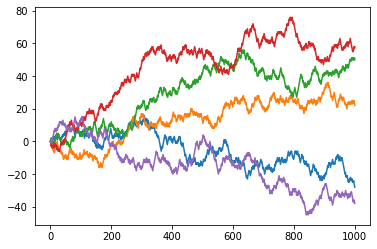

In [8]:
# ランダムウォークを５つ重ねてプロット
for i in range(5):
    xList = randomWalk(1000)
    plt.plot(xList)

# 3

In [308]:
def WFModel(num_pop, init_num_tgt,gen, extinct_break = False):
    """Wright-Fisher model
    
    ハプロタイプを仮定したライト-フィッシャーモデルに基づく遺伝的浮動．
    
    Args:
        num_pop: 集団サイズ
        init_num_tgt: 注目している遺伝子型の初期数
        extinct_break: どちらかの遺伝子型が絶滅した場合に処理を中断するか
    
    Returns:
        aList: 各世代の遺伝子型を記録したリスト
    
    """
    if num_pop < init_num_tgt:
        print("注目する遺伝子型の初期値`init_num_tgt`は集団サイズ`num_pop`以下でなければならない．")
        return
    
    numPop = num_pop
    genFin = gen
    
    a = [] # 集団の注目している対立遺伝子を記録するリスト
    aa = [] # 次世代集団の注目している対立遺伝子を記録するリスト

    for i in range(numPop):
        if i < init_num_tgt:
            a.append(0)
        else:
            a.append(1)

    # aaの初期化
    for i in range(len(a)):
        aa.append(0)

    aList = [a]
    for t in range(genFin):
        for i in range(numPop):
            p1 = random.randrange(numPop)
            p2=p1
            while(p1==p2):
                p2 = random.randrange(numPop)
            r = random.choice([a[p1],a[p2]])
            aa[i] = r
        a = copy.deepcopy(aa)
        aList.append(list(a))
        
        if ((sum(a) == numPop) or (sum(a) == 0)) and extinct_break:
            break
        
    return aList

In [16]:
def WFModel(num_pop, init_num_tgt,gen, extinct_break = False):
    """Wright-Fisher model
    
    ハプロタイプを仮定したライト-フィッシャーモデルに基づく遺伝的浮動．
    
    Args:
        num_pop: 集団サイズ
        init_num_tgt: 注目している遺伝子型の初期数
        extinct_break: どちらかの遺伝子型が絶滅した場合に処理を中断するか
    
    Returns:
        aList: 各世代の遺伝子型を記録したリスト
    
    """
    if num_pop < init_num_tgt:
        print("注目する遺伝子型の初期値`init_num_tgt`は集団サイズ`num_pop`以下でなければならない．")
        return
    
    numPop = num_pop
    genFin = gen
    
    a = [] # 集団の注目している対立遺伝子を記録するリスト
    aa = [] # 次世代集団の注目している対立遺伝子を記録するリスト

    for i in range(numPop):
        if i < init_num_tgt:
            a.append(0)
        else:
            a.append(1)

    # aaの初期化
    for i in range(len(a)):
        aa.append(0)

    aList = [a]
    for t in range(genFin):
        for i in range(numPop):
            p1 = random.randrange(numPop)
            p2=p1
            while(p1==p2):
                p2 = random.randrange(numPop)
            r = random.choice([a[p1],a[p2]])
            aa[i] = r

        for i in range(numPop):
            a[i] = aa[i]
        aList.append(list(a))
        
        if ((sum(a) == numPop) or (sum(a) == 0)) and extinct_break:
            break
        
    return aList

In [9]:
test1 = [1,2,3]
test2 = test1

In [10]:
test1

[1, 2, 3]

In [11]:
test2

[1, 2, 3]

In [13]:
test1[1]=4

In [14]:
test1

[1, 4, 3]

In [15]:
test2

[1, 4, 3]

In [17]:
# ライト-フィッシャーモデルに基づく計算
aList = WFModel(100,50,500)

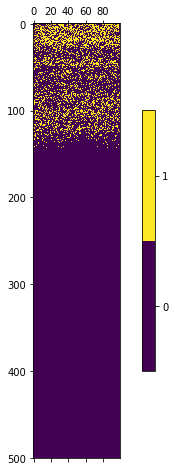

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(aList,interpolation=None, vmin=0, vmax=1)
plt.colorbar(cax, ticks=[0,1],boundaries=[-0.5,0.5,1.5],shrink=0.6)

In [20]:
# 頻度の計算
pList = []
for a in aList:
    pList.append(sum(a)/len(a))

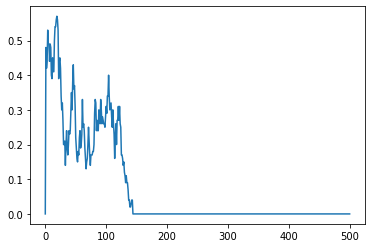

In [21]:
plt.plot(pList)

In [22]:
# 100回分の平均計算
waiting_t = []
for tnum in range(1000):
    aList = WFModel(100,50,2000,True)
    if sum(aList[-1]) == 0:
        waiting_t.append(len(aList)-1)
    if len(waiting_t)>99:
        break

In [23]:
mean(waiting_t)

141.16

# 4

In [323]:
# 集団サイズ 100
pop_num = 100

kList100 = [k/pop_num for k in range(1,pop_num,10)]
waiting_t_mean_100 = []
for k in range(1,pop_num,10):
    waiting_t = []
    for tnum in range(10000):
        aList = WFModel(pop_num,k,10000,True)
        if sum(aList[-1]) == 0:
            waiting_t.append(len(aList))
        if len(waiting_t)>99:
            break
    waiting_t_mean_100.append(mean(waiting_t))


# 集団サイズ 200
pop_num = 200

kList200 = [k/pop_num for k in range(2,pop_num,20)]
waiting_t_mean_200 = []
for k in range(2,pop_num,20):
    waiting_t = []
    for tnum in range(1000):
        aList = WFModel(pop_num,k,10000,True)
        if sum(aList[-1]) == 0:
            waiting_t.append(len(aList))
        if len(waiting_t)>99:
            break
    waiting_t_mean_200.append(mean(waiting_t))

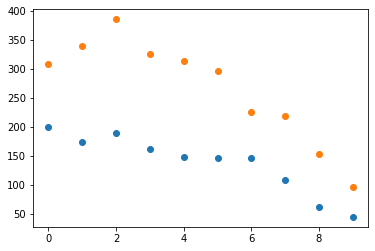

In [324]:
plt.plot(waiting_t_mean_100, "o",waiting_t_mean_200, "o" )

# 5

In [319]:
import math

In [325]:
def waiting_t_a(p,pop_num):
    t = -(1/p)*((2*pop_num)*(1-p)*math.log(1-p))
    return t

In [326]:
kListA100 = []
wtaList100 = []
for i in range(1,100):
    k = 0.01*i
    t = waiting_t_a(k,100)
    kListA100.append(k)
    wtaList100.append(t)
    
kListA200 = []
wtaList200 = []
for i in range(1,100):
    k = 0.01*i
    t = waiting_t_a(k,200)
    kListA200.append(k)
    wtaList200.append(t)

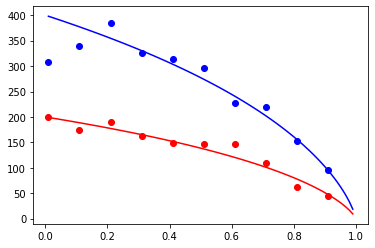

In [327]:
plt.plot(kListA100,wtaList100, "r", kListA200,wtaList200, "b")
plt.plot(kList100,waiting_t_mean_100, "ro",kList200,waiting_t_mean_200, "bo" )